In [87]:
import pandas as pd
import numpy as np

train = pd.read_csv('../ML-Dataset/titanic-train.csv')

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
#check null values
#we can use seaborn for this -- heatmap

In [64]:
import seaborn as sns

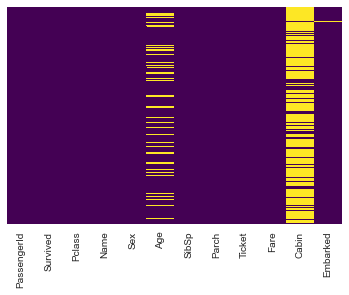

In [65]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
#lets visualize some more

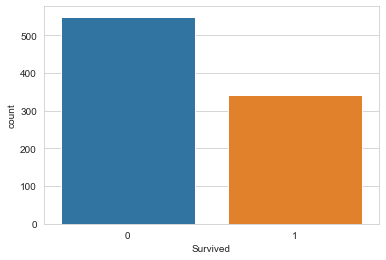

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

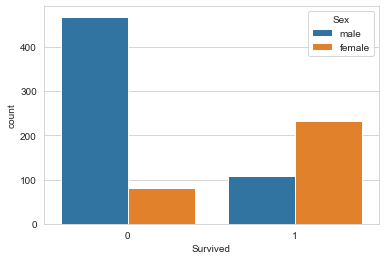

In [23]:
#check count of male or female who survived
#have used hue -- will split the survived column on the basis of hue

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

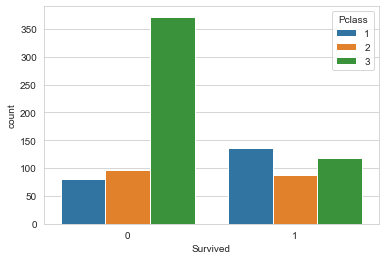

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

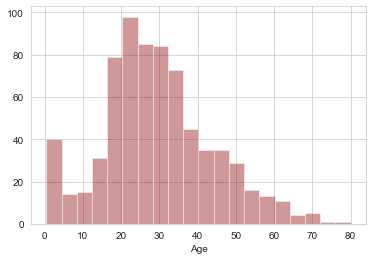

In [28]:
#now lets explore data in terms of age
sns.distplot(train['Age'].dropna(),kde=False,color='darkred')

In [30]:
#Data cleaning

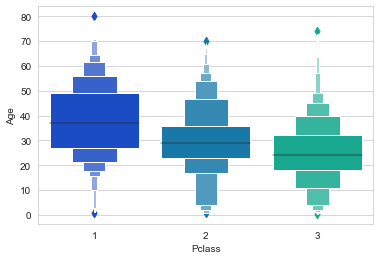

In [31]:
sns.boxenplot(x='Pclass', y='Age', data=train, palette='winter')

In [32]:
# we got the average for all the classes from this boxplot with respect to the age,
# now we can just replace the null values in age colum with respective average values

In [89]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [90]:
#apply above funcn
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

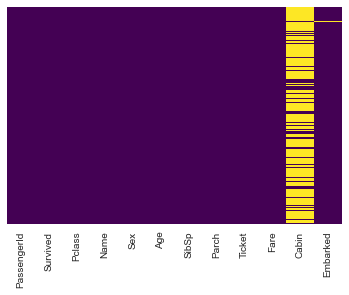

In [68]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [43]:
#null values for Age are handled, now consider cabin -- which we are thinking to drop

In [91]:
train.drop('Cabin',axis=1,inplace=True)

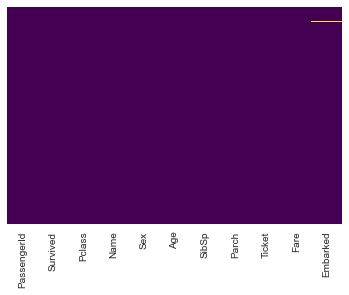

In [70]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [111]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [112]:
new_df = train.drop(['Embarked', 'Name', 'Ticket', 'Sex'], axis=1)

In [117]:
new_df = pd.concat([new_df,sex,embark],axis=1)

In [118]:
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [119]:
new_df.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [120]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Survived', axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101
)

In [129]:
#training and predictions

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [134]:
predictions = logmodel.predict(X_test)

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
accuracy = confusion_matrix(y_test, predictions)

In [139]:
from sklearn.metrics import accuracy_score

In [140]:
accuracy = accuracy_score(y_test, predictions)

In [141]:
accuracy

0.7873134328358209